**Leo Qian**

Fall 2021

CS 251: Data Analysis and Visualization

# Lab 2: Matrix Transformations, Numpy and MatPlotLib
## Task 1: Setup, data import and projection

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [1]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [14,10]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 1b) Projection
1. Read the toy dataset in 'data/gauss_3d.csv' using genfromtxt into a numpy matrix with 3 columns (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Create a figure with 3 subplots, one for every possible combination of the dataset's dimensions (X vs Y, Y vs Z, and Z vs X). Each of these plots shows a different 2D __projection__ of the 3D dataset (each column is a different dimension). 
  - Remember pyplot? [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) 
  - Remember subplots?  [pyplot.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) 
  
3. Make sure each subplot has a title

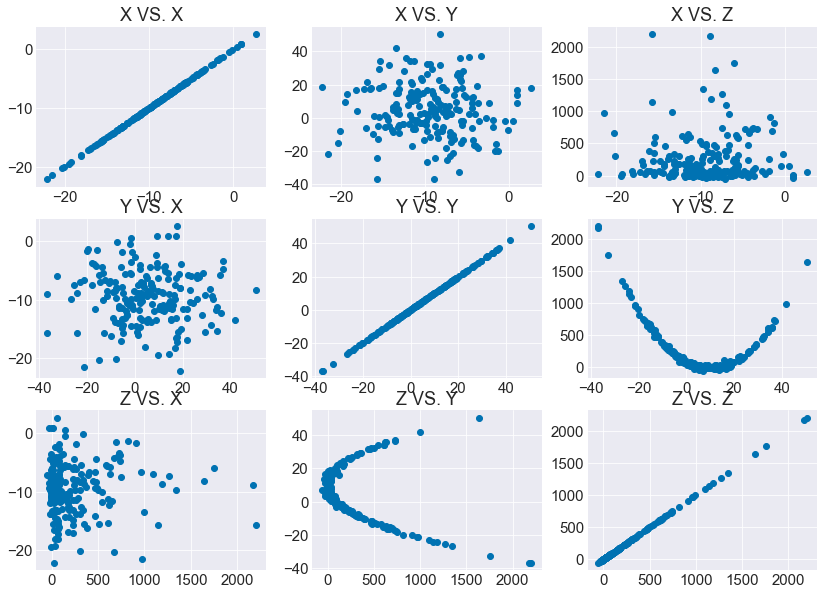

In [2]:
arr = np.genfromtxt('data/gauss_3d.csv',delimiter=',')

plt.subplots(3,3)
x = 1
y = 0
for i in range(arr.shape[1]):
    for j in range(arr.shape[1]):
        plt.subplot(3,3,x+y)
        plt.scatter(arr[:,i],arr[:,j])
        y += 1

        x_name = ''
        y_name = ''
        if i == 0: 
            x_name = 'X'
        if j == 0:
            y_name = 'X'
        if i == 1:
            x_name = 'Y'
        if j == 1:
            y_name = 'Y'
        if i == 2:
            x_name = 'Z'
        if j == 2:
            y_name = 'Z'
        plt.title(x_name+" VS. "+y_name)
        
    y -= 1
    x += 1

plt.show()



### 1c) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [3]:
ones = np.ones([arr.shape[0],1])
combined = np.hstack((arr,ones))
print(arr.shape,ones.shape,combined.shape)

(200, 3) (200, 1) (200, 4)


## Task 2: Translation

### 2a) Create the Translation Matrix

<img src="img/Translation-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that translates the dataset
  - +25 units in the Y direction  (t<sub>y</sub>)
  - -1000 units in the Z direction (t<sub>z</sub>)
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print your matrix


In [4]:
transposed = combined.T
transform = np.eye(4,4)
transform[1,3] = 25
transform[2,3] = -1000
print(transform)

[[    1.     0.     0.     0.]
 [    0.     1.     0.    25.]
 [    0.     0.     1. -1000.]
 [    0.     0.     0.     1.]]


### 2b) Translate Data and Visualize Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and translated results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the translated data in different colors.
  - <i>You can implement this as a function. You'll be repeating this visualization with different transformation matrices.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

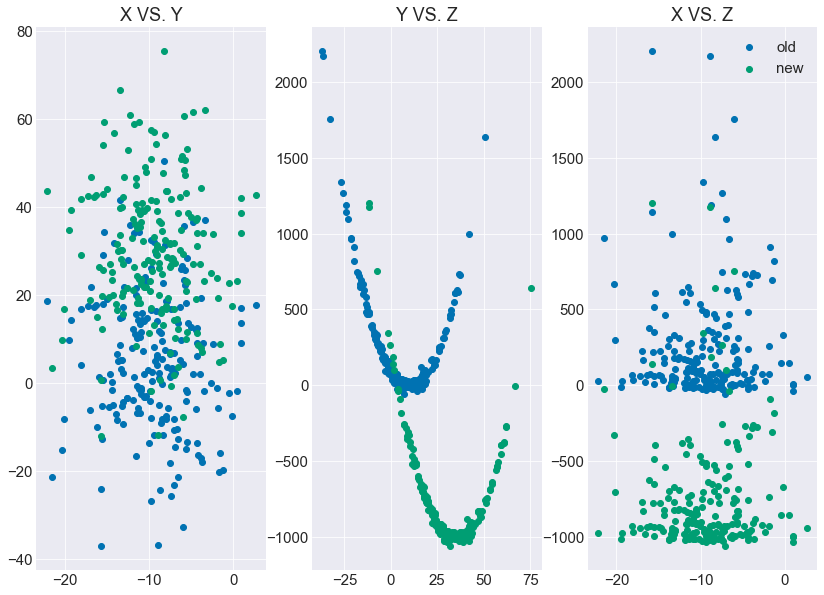

In [8]:
transformed = transform @ transposed


plt.subplots(1,3)

plt.subplot(1,3,1)
plt.scatter(transposed[0,:],transposed[1,:])
plt.scatter(transformed[0,:],transformed[1,:])
plt.title("X VS. Y")

plt.subplot(1,3,2)
plt.scatter(transposed[1,:],transposed[2,:])
plt.scatter(transformed[1,:],transformed[2,:])
plt.title("Y VS. Z")

plt.subplot(1,3,3)
plt.scatter(transposed[0,:],transposed[2,:])
plt.scatter(transformed[0,:],transformed[2,:])
plt.title("X VS. Z")
plt.legend(['old','new'])

plt.show()




## Task 3: Scale

### 3a) Create a Scaling Matrix

<img src="img/Scaling-Matrix2.png" align="right"/>

<i>Image: Example of translation matrix multiplied with a vector</i>

1. Design a transformation matrix that scales the dataset
  - by 3 in the X axis
  - by 0.1 in the Z axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - Print the matrix

In [6]:
scale = np.eye(4,4)
scale[0,0] = 3
scale[2,2] = 0.1
print(scale)




[[3.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  0.1 0. ]
 [0.  0.  0.  1. ]]


### 3b) Scale Data and Visualize the Results

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and scaled results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the scaled data in different colors.
  - <i>If you implemented a function in the previous step, you can use it here.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

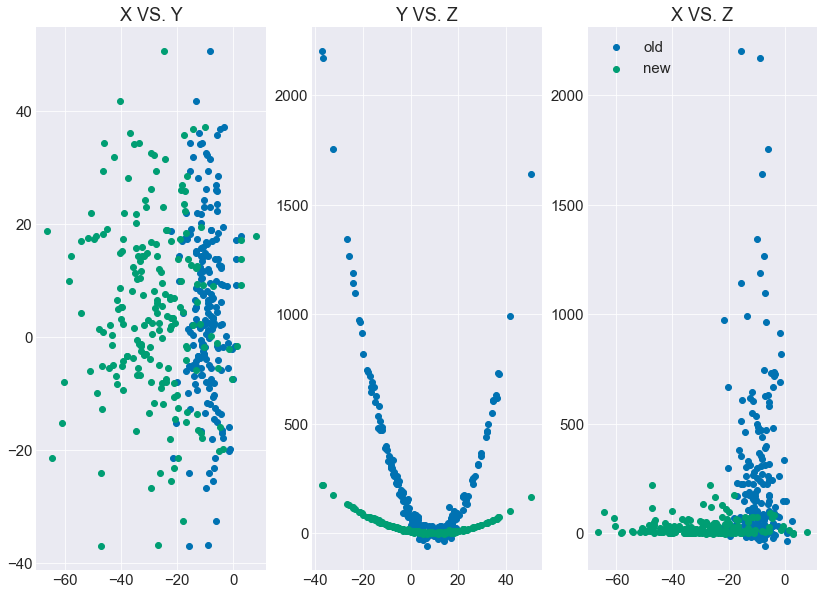

In [9]:
transformed = scale @ transposed

plt.subplots(1,3)

plt.subplot(1,3,1)
plt.scatter(transposed[0,:],transposed[1,:])
plt.scatter(transformed[0,:],transformed[1,:])
plt.title("X VS. Y")

plt.subplot(1,3,2)
plt.scatter(transposed[1,:],transposed[2,:])
plt.scatter(transformed[1,:],transformed[2,:])
plt.title("Y VS. Z")

plt.subplot(1,3,3)
plt.scatter(transposed[0,:],transposed[2,:])
plt.scatter(transformed[0,:],transformed[2,:])
plt.title("X VS. Z")
plt.legend(['old','new'])

plt.show()
